<a href="https://colab.research.google.com/github/HamedFarahani89/Quantum-Computing-Lab/blob/main/Simple_quantum_circuit_PennyLane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 16.0 MB/s eta 0:00:00


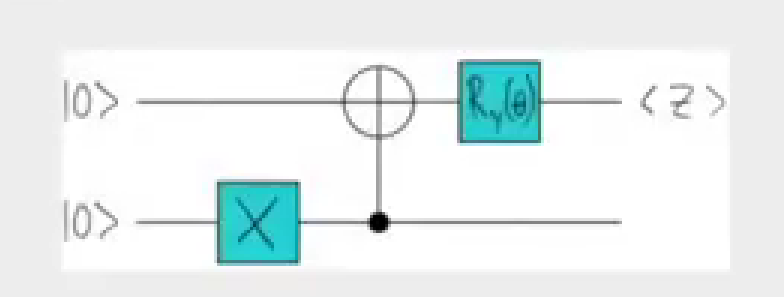

In [6]:
from IPython.display import Image
Image(filename='circuit.png')

In [7]:
import pennylane as qml
from pennylane import numpy as np

# Key Components  
This notebook consists of two main components:  
1. **Device** – Defines the quantum hardware or simulator.  
Here is the object that applies the quantum operation and returns classical quantities, such as measurements.
2. **Quantum Function** – Implements the quantum operations and circuits.  


In [8]:
dev = qml.device("default.qubit", wires=2)

We use a simulator called **`default.qubit`**. To define a device, we need two arguments: a string specifying the device and the number of qubits, referred to as **wires** in this context.

In [9]:
@qml.qnode(dev)
def circuit(theta):
    qml.PauliX(wires=1)
    qml.CNOT(wires=[1, 0])
    qml.RY(theta, wires=0)

    return qml.expval(qml.PauliZ(wires= 0))

By default, in PennyLane, all qubits start in the $|0\rangle$ state, so we only need to define our operations.  

Additionally, in PennyLane, quantum operations are represented using **QNodes**, which are created by applying a decorator above our quantum function.

# **Analytical Analysis of the Quantum Circuit**

By default, in PennyLane, all qubits start in the **$|0\rangle\$** state. Since our circuit operates on two qubits, the initial state is:

$
|\psi_0\rangle = |00\rangle
$

### **Step 1: Applying the Pauli-X Gate on Qubit 1**
The **Pauli-X** gate flips the state of qubit **1**:

$
X |0\rangle = |1\rangle
$

Thus, the state changes from **\(|00\rangle\)** to **\(|10\rangle\)**.

$
|\psi_1\rangle = |10\rangle
$

### **Step 2: Applying the CNOT Gate**
The **CNOT (Controlled-NOT) gate** operates on two qubits:
- **Control qubit (1)**: If it is \(|1\rangle\), the target qubit is flipped.
- **Target qubit (0)**: Its state changes if the control is \(|1\rangle\).

Since the current state is **\(|10\rangle\)**, the control qubit is **1**, causing the NOT operation on qubit **0**:

$
CNOT |10\rangle = |11\rangle
$

Thus, after this step:

$
|\psi_2\rangle = |11\rangle
$

### **Step 3: Applying the RY Gate on Qubit 0**
The **RY gate** performs a rotation around the **Y-axis** of the Bloch sphere:

$
RY(\theta) =
\begin{bmatrix}
\cos(\theta/2) & -\sin(\theta/2) \\
\sin(\theta/2) & \cos(\theta/2)
\end{bmatrix}
$

Applying **RY(θ)** on qubit **0**, which is in state **$|1\rangle\$**:

$
RY(\theta) |1\rangle = \cos(\theta/2) |1\rangle + \sin(\theta/2) |0\rangle
$

Thus, the overall system state becomes:

$
|\psi_3\rangle = |1\rangle \otimes \left( \cos(\theta/2) |1\rangle + \sin(\theta/2) |0\rangle \right)
$

$
= \cos(\theta/2) |11\rangle + \sin(\theta/2) |10\rangle
$

### **Step 4: Expectation Value of Pauli-Z on Qubit 0**
The **Pauli-Z** operator acts on qubit **0**:

$
Z =
\begin{bmatrix}
1 & 0 \\
0 & -1
\end{bmatrix}
$

The expectation value is given by:

$
\langle Z \rangle = \langle \psi_3 | Z \otimes I | \psi_3 \rangle
$

Since **Pauli-Z** only acts on qubit **0**, we compute:

$
\langle Z \rangle = |\sin(\theta/2)|^2 - |\cos(\theta/2)|^2
$

Using trigonometric identities:

$
\langle Z \rangle = -\cos(\theta)
$

### **Final Result**
The circuit returns:

$
\langle Z \rangle = -\cos(\theta)
$

This means that the output varies in the range **[-1, 1]** depending on the parameter **θ**.

---

### **Summary**
- The circuit initializes both qubits in \(|00\rangle\).
- A **Pauli-X** gate flips qubit **1** to **1**.
- A **CNOT** gate flips qubit **0**, entangling it with qubit **1**.
- A **RY(θ)** rotation is applied to qubit **0**.
- The expectation value of **Pauli-Z** on qubit **0** is measured.

The final output follows the analytical function:

$
\langle Z \rangle = -\cos(\theta)
$

🚀 *This mathematical insight allows us to predict the behavior of the quantum circuit without running it on a simulator!*


# Examples

In [11]:
print(circuit(np.pi))

1.0


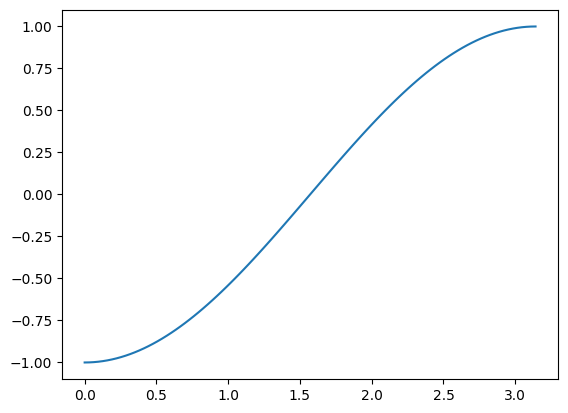

In [14]:
import matplotlib.pyplot as plt

theats = np.linspace(0, np.pi, 100)
plt.plot(theats, [circuit(theta) for theta in theats])
plt.show()

# **Matrix Representation of the Quantum Circuit**

### **Step 1: Initial State \( |00\rangle \)**
By default, all qubits start in the \( |0\rangle \) state:

$$
|\psi_0\rangle = |00\rangle =
\begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}
$$

### **Step 2: Applying the Pauli-X Gate on Qubit 1**
The **Pauli-X** gate flips a qubit and is represented by:

$$
X =
\begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix}
$$

For a **two-qubit system**, applying **Pauli-X** on qubit **1**:

$$
I \otimes X =
\begin{bmatrix}
0 & 1 & 0 & 0 \\
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{bmatrix}
$$

Applying this to \( |00\rangle \):

$$
|\psi_1\rangle = (I \otimes X) |\psi_0\rangle =
\begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix} = |10\rangle
$$

### **Step 3: Applying the CNOT Gate (Control: Qubit 1, Target: Qubit 0)**
The **CNOT** gate in matrix form (control: qubit 1, target: qubit 0) is:

$$
CNOT =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}
$$

Applying this to \( |10\rangle \):

$$
|\psi_2\rangle = CNOT |\psi_1\rangle =
\begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix} = |01\rangle
$$

### **Step 4: Applying the \( R_Y(\theta) \) Gate on Qubit 0**
The **\( R_Y(\theta) \)** gate:

$$
R_Y(\theta) =
\begin{bmatrix}
\cos(\theta/2) & -\sin(\theta/2) \\
\sin(\theta/2) & \cos(\theta/2)
\end{bmatrix}
$$

For a two-qubit system:

$$
R_Y(\theta) \otimes I =
\begin{bmatrix}
\cos(\theta/2) & -\sin(\theta/2) & 0 & 0 \\
\sin(\theta/2) & \cos(\theta/2) & 0 & 0 \\
0 & 0 & \cos(\theta/2) & -\sin(\theta/2) \\
0 & 0 & \sin(\theta/2) & \cos(\theta/2)
\end{bmatrix}
$$

Applying this to \( |01\rangle \):

$$
|\psi_3\rangle = (R_Y(\theta) \otimes I) |\psi_2\rangle
$$

$$
=
\begin{bmatrix} 0 \\ \sin(\theta/2) \\ \cos(\theta/2) \\ 0 \end{bmatrix}
$$

Thus:

$$
|\psi_3\rangle = \sin(\theta/2) |01\rangle + \cos(\theta/2) |11\rangle
$$

### **Step 5: Expectation Value of Pauli-Z on Qubit 0**
The **Pauli-Z** operator:

$$
Z =
\begin{bmatrix}
1 & 0 \\
0 & -1
\end{bmatrix}
$$

For a **two-qubit system**, when acting on qubit **0**:

$$
I \otimes Z =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & -1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -1
\end{bmatrix}
$$

Computing the expectation value:

$$
\langle \psi_3 | (I \otimes Z) | \psi_3 \rangle
$$

Expanding:

$$
\left( \sin(\theta/2) \langle 01| + \cos(\theta/2) \langle 11| \right)
(I \otimes Z)
\left( \sin(\theta/2) |01\rangle + \cos(\theta/2) |11\rangle \right)
$$

$$
= \sin^2(\theta/2) (-1) + \cos^2(\theta/2) (1)
$$

$$
= -\sin^2(\theta/2) + \cos^2(\theta/2)
$$

$$
= \cos(\theta)
$$

### **Final Result**
The circuit returns:

$$
\langle Z \rangle = \cos(\theta)
$$

which is the analytical expectation value for this quantum circuit.

### **Summary**
- The **initial state** is \( |00\rangle \).
- The **Pauli-X gate** flips qubit **1**, resulting in \( |10\rangle \).
- The **CNOT gate** swaps qubits, producing \( |01\rangle \).
- The **\( R_Y(\theta) \)** gate rotates qubit **0**.
- The **Pauli-Z expectation value** is computed, yielding \( \cos(\theta) \).

$$
\langle Z \rangle = \cos(\theta)
$$

🚀 *This full matrix formulation gives a rigorous understanding of how the quantum operations transform the system!*


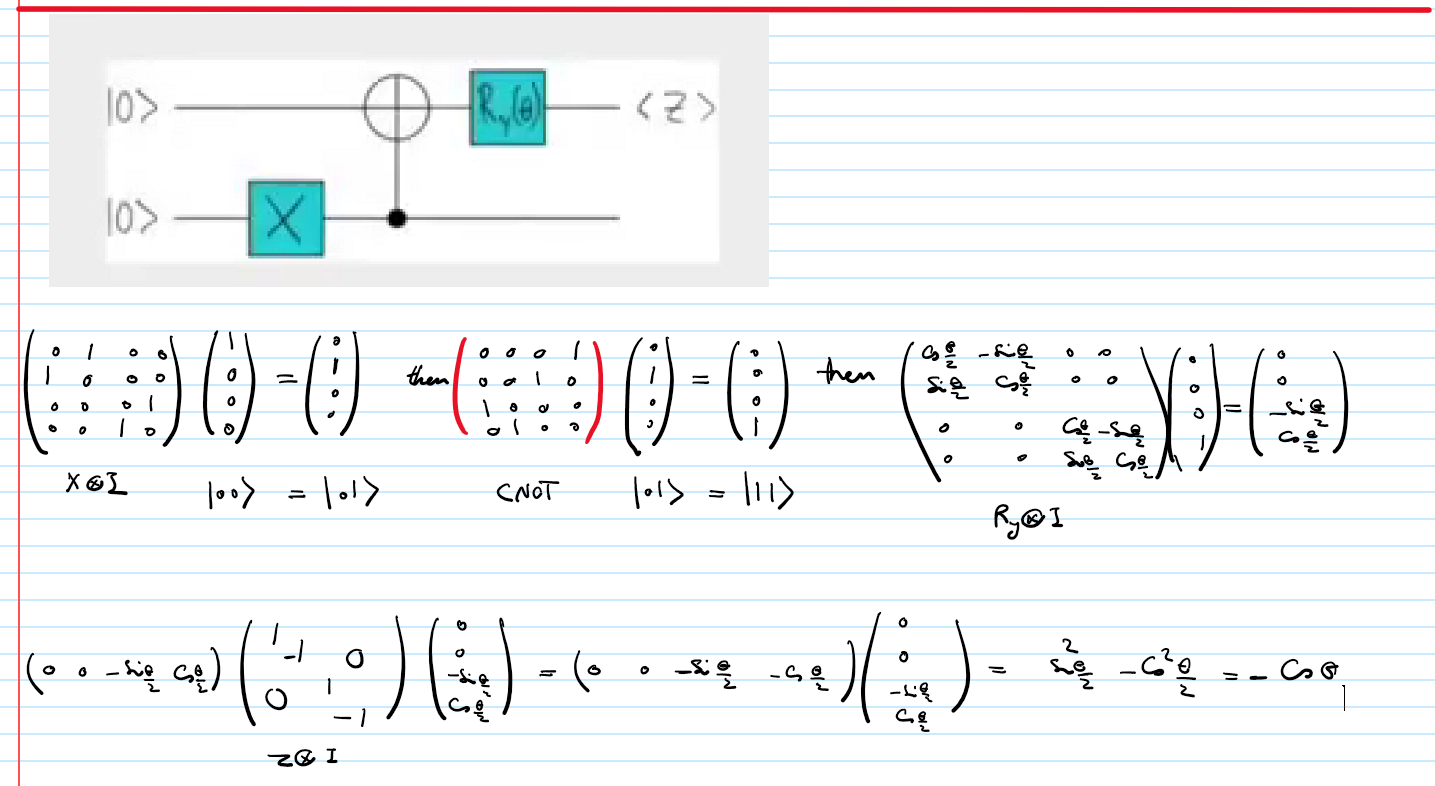

In [15]:
Image(filename='matrix_cal.png')